# Describing Distributions (Core)
 - Kevin Ridge

### Instructions:

In this assignment, you will be analyzing & visualizing several features in the Medical Dataset.


The features to analyze: 

  - VitD_levels
  - Doc_visits
  - TotalCharge

For each feature listed:

- Plot a histogram with a kde (kernel density estimate)
- Add a line for the mean (red)
- Add a line for the median (green)
- Add a line for for +1 std from the mean (black)
- Add a line for the - 1 std from the mean (black)
- Highlight the range between +1 and =1 std (yellow)
 
Answer the following questions:
- Is it Discrete or Continuous?
- Does it have a skew? If so, which direction (+/-)
- What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

# Load Data

In [22]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [23]:
df = pd.read_csv('Data/data (3).csv')

### Inpect the dataframe

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

In [33]:
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


# Create function

In [26]:
# function from the learning platform 

def plot (df, col):
    feature = df[col]
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    plus_one_std = mean + std
    minus_one_std = mean - std
    fig,ax = plt.subplots(figsize=(10,6))
    sns.histplot(feature ,ax=ax,stat='probability', kde=True)
    ax.axvline(plus_one_std, color = 'black',label=f'+1 STD = {plus_one_std:,.2f}')
    ax.axvline(minus_one_std, color = 'black', label = f'-1 STD = {minus_one_std:,.2f}')
    ax.axvline(mean, color = 'red', label = f'MEAN = {mean:,.2f}')
    ax.axvline(median, color = 'green', label = f'MEDIAN = {median:,.2f}')
    ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
    ax.set_title(f'{col}')
    ax.legend();

### Create visuals

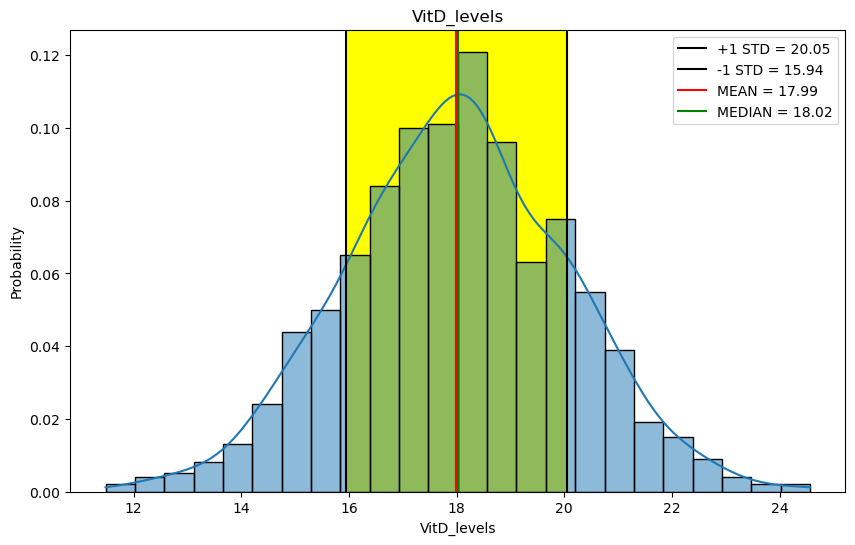

In [27]:
# Display VitD_levels plot
plot(df,'VitD_levels')

In [28]:
# Kurtosis score for VitD_levels
k = stats.kurtosis(df['VitD_levels'], fisher = False)
print(k)

3.013147515833447


### Answer the following questions for VitD_levels:

1.  Is it Discrete or Continuous?

 - It is continuous.
 
 
2. Does it have a skew? If so, which direction (+/-)

 - There is no skew.
 
 
3. What type of kurtosis does it display?

 - Mesokurtic display.

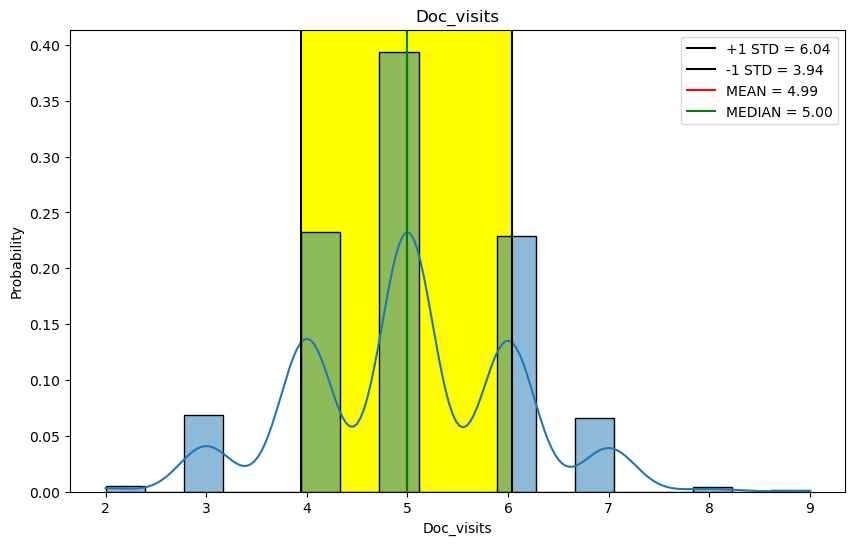

In [29]:
# Display Doc_visits plot
plot(df, 'Doc_visits')

In [30]:
# Kurtosis score for Doc_visits
kd= stats.kurtosis(df['Doc_visits'], fisher = False)
print(kd)

2.9919958083381206


### Answer the following questions for Doc_visits:

1.  Is it Discrete or Continuous?

 - It is discrete.
 
 
2. Does it have a skew? If so, which direction (+/-)

 - There is no skew.
 
 
3. What type of kurtosis does it display?

 - The graph displays Mesokurtic even though the kurtosis value is slightly below 3. It is worth noting that if I had put the kurtosis calculation in the lp function, it would have printed 'Platykurtic' unless I rounded up. 

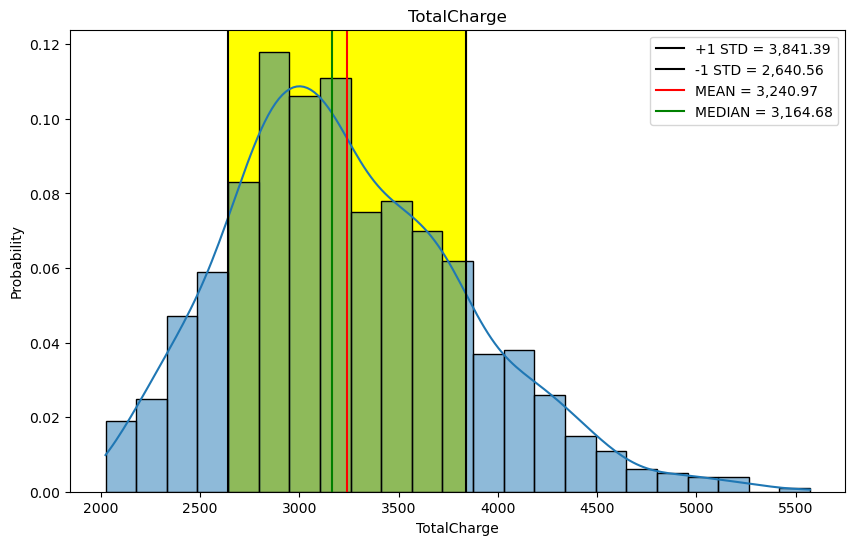

In [31]:
# Display TotalCharge plot
plot(df, "TotalCharge")

In [32]:
# Kurtosis score for TotalCharge
kc= stats.kurtosis(df['TotalCharge'], fisher = False)
print(kc)

3.2650077463439384


### Answer the following questions for TotalCharge:

1.  Is it Discrete or Continuous?

 - It is continuous.
 
 
2. Does it have a skew? If so, which direction (+/-)

 - One could point to a positive OR negative skew in this graph. However, I will say it is negatively skewed since both the mean and median meet with the kde line on the decline. I am not sure if that is a logical assumption that makes sense in this or other applications.
 
 
3. What type of kurtosis does it display?

 - Lepokurtic display.